# Lab 02 : Perceptron

In [1]:
import numpy as np

### Forward Propogation of a Perceptron

Task 1: Implement the forward propogation of a single perceptron using only numpy and python functions.


A single perceptron can be used for binary classification. Perceptron can be used to implement only linearly seprable functions.

The perceptron would look like something as follows:

![image.png](img/1.png)

Source: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53



Mathematically the Perceptron equation looks as follows :-


![image.png](img/math.png)
Source : https://towardsdatascience.com/perceptron-the-artificial-neuron-4d8c70d5cc8d




Where W1 , W1.. Wn are the weights and X1 , X2 ,...Xn are the inputs. Furthere their is a non-linear activation function f(a) that gives output out.

Here , W0 is the bias which in the equation can be taken as b.

a = x1*w1 + x2*w2 + x3*w3 + b   # Weighted Sum
z = f(a)                        # Activation Function

In our case the the activation is ReLu

The non-linear activation function is the ReLU function which is defined as follows:


            x, if x > 0
ReLU(x) = 
            
            0, otherwise
             
Complete the Perceptron Class given below


In [2]:
def step(x):
    """ Implements the Step function. """
    if x > 0:
        return 1

    return 0

class Neuron:
    
    def __init__(self):
        """ Class that depicts a single neuron. 
            Input dimension of this neuron is 3. """

        self.bias = -0.2
        self.weights = [-0.5, 0.1, 0.7]
        self.input_dim = 3
    
    def propagate(self, X):
        """ For each instance, calculate a and then z.
        
            Parameters
            ----------
            X: list of lists
                The input instances. """
        
        outputs = list()
        for x in X:
            z = self._weighted_sum(x)
            a = self._activation_function(z)
            outputs.append(a)
            
        return outputs

    def _weighted_sum(self, inputs):
        """ Calculate the weighted sum from one instance.
            
            Parameters
            ----------
            inputs: list of numbers
                e.g. [0.1, 0.2, 0.7]. """
        
        dot_product = 0
        for i in range(self.input_dim):
            dot_product += self.weights[i]*inputs[i]

        dot_product += self.bias

        return dot_product

    def _activation_function(self, x):
        """ Returns ReLU(x). """
        return step(x)

In [3]:
inputs = [[0.1, 0.2, 0.7], [0.5, 0.9, 0.1], [0.02, 0.1, 0.7]]

In [4]:
neuron = Neuron()
outputs = neuron.propagate(inputs)

In [5]:
outputs

[1, 0, 1]

A perceptron is made up of just one neuron. So we can make a wrapper class over the neuron to model a Perceptron. The following part is just for demonstrating this. Don't change anything.

This demonstrates one forward pass of a perceptron. The next step is to calculate the losses using the errors and change weights by backpropagation.



In [6]:
class Perceptron:
    
    def __init__(self):
        self.neuron = Neuron()
        
    def train(self, X_train, y_train):    
        self.X_train = X_train
        self.y_train = y_train
        
        self.errors = []
        self.activations = self.forward_propagate()
        self.errors = self.calculate_errors()
        
    def forward_propagate(self):
        return self.neuron.propagate(self.X_train)
    
    def calculate_errors(self):
        errors = [self.activations[i] - self.y_train[i] for i in range(len(self.y_train))]
        return errors

In [7]:
perceptron = Perceptron()
perceptron.train(inputs, [0.3, 0.01, 0.33])
perceptron.errors

[0.7, -0.01, 0.6699999999999999]

### Functions for plotting graphs

In [8]:


def plot_loss(epoch_his, train_loss_his, test_loss_his):
    train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

def plot_accuracy(epoch_his, train_acc_his, test_acc_his):
    train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()



### Loss Function

In [9]:

def binary_cross_entropy(pred , Y):
    """
    The binary cross entropy loss.
    Note
    -pred should be in range [0,1]
    -Y should be a binary vector
    Inputs
    -pred: a numpy array reprsenting predictions made by the model
    -Y : a numpy  array representing the target variable
    Note that shape(pred) = shape(Y)
    Returns
    - loss : a scalar value to represent the loss
    - d_pred : a vector of the same shape as pred. It represents the error
            to be used for backpropogation(shape(d_pred) = shape(pred))
    """

    # clipping the inputs so there is no overflow
    epsilon = 1e-11
    pred = np.clip(pred , epsilon, 1 - epsilon)
    divisor = np.maximum(pred * (1-pred),epsilon)

    N = Y.shape[0]

    first_term = Y * np.log(pred)
    second_term = (1 - Y) * np.log(1 - pred)
    loss = -1  * np.mean( first_term + second_term ,axis =0)
    

    return loss

### Metric Function

In [10]:

def accuracy_binary(pred , Y):
    """
    Computes the zero one accuracy for a binary classificatiion
    Inputs:
    -pred: Column vector representing probabilities of Class == 1
    -Y: Binary column vector
    """
    pred =pred > 0.5
    acc = np.sum(pred == Y)
    acc = float(acc) / len(Y)
    return acc

## Classification on MNIST Data

Now that we have implemented our own Perceptron we can use it to classify a real world dataset.

We will try to train our model to MNIST dataset.MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. 

 
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples.

You can download and checkout the various benchmarks at http://yann.lecun.com/exdb/mnist/ for MNIST.



![title](img/MnistExamples.png)

Example of some images in the dataset

But as perceptron only does binary classification so we will do classification between number 0 and 1 only

### Loading MNIST Data


Download the data from the following link : https://www.kaggle.com/c/digit-recognizer/data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('./train.csv')

In [13]:
Y = data['label']

X = data.drop('label' , axis = 1)

Now we can see the dimensions of the data . MNIST has 28 x 28 pixel grayscale images which when flattened(converted to 1D) gives 784 size vector

In [14]:
X.shape

(42000, 784)

In [15]:
Y.shape

(42000,)

In [16]:
## Extracting the data for 0 and 1 only

X = X[(Y == 0) | (Y == 1)].reset_index(drop = True)
Y  = Y[(Y == 0) | (Y == 1)].reset_index(drop = True)

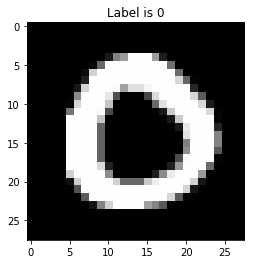

In [17]:
#lets try plotting a image

sample = 3 #try changing this number

number = X.iloc[sample].values.reshape((28, 28))
label = Y.iloc[sample]
# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(number, cmap='gray')
plt.show()


Now that we know and understand the data lets us try to train our model

### Training Model

In [18]:
# we first split the data into training and validation set
from sklearn.model_selection import train_test_split
train_x , test_x, train_y , test_y = train_test_split(X.values , Y.values.reshape(-1,1), test_size = 0.2)


In [19]:
train_x.shape

(7052, 784)

In [20]:
train_y.shape

(7052, 1)

## Include Learning into the Perceptron

Now we will modify our perceptron class to include perceptron learning algorithm.


![image.png](img/learn.png)

In [28]:
def step(x):
    """ Implements the ReLU function. """
    return (x > 0 )



class Perceptron:
    
    def __init__(self):
        self.W = np.random.randn(784 , 1) #decalre an array of shape 784, 1(classication on MNIST DATA)
        self.b = 0
        
    def forward_propagate(self , x):
        print(self.W.shape)
        return step(x.dot(self.W) + self.b)
    
    def update_weights(self, x , y , y_dash):
        
        if(y== 1 and y_dash== 0):
            self.W = self.W + x.reshape(-1 , 1)
            self.b = self.b + 1
            
        if(y== 0 and y_dash== 1):
            self.W = self.W - x.reshape(-1 , 1)
            self.b = self.b - 1
            
        
        

    def train(self,
            X_train,
            Y_train,
            X_test,
            Y_test,
            metric_fn = accuracy_binary,
            loss_fn = binary_cross_entropy,
            epochs=200,
            record_at = 10,
            verbose = True):
        
        
        """
        This function trains the neural network
        Inputs:
        - X_train : The training dataset
        - Y_train : The training target values
        - X_test : The testing dataset
        - Y_test : The testing target values
        - metric : The metric function for assesing the model (default : accuracy_binary)
        - loss_function_string : The loss function (default : mean_square_error)
        - epochs : The number of epochs for which the model will be trained (default : 200)
        - record_at :  The epoch interval at which the loss and metric will be recorded (default : 100)
        - Verbose : Display the statistics, metrics and progress of the model while training (default : True)
        
        """
        train_loss_his = []
        train_acc_his = []
        test_loss_his = []
        test_acc_his = []
        epoch_his = []

        for i in range(epochs):
            
            for j in range(len(X_train)):
                
                x = X_train[j]
                y = Y_train[j]
                #print( i , j ,x.shape ,y.shape, y)
                y_dash = self.forward_propagate(x)
                
                #print(i , j ,y_dash.shape, y_dash)
            
            
                #loss= loss_fn(y_dash,Y_train)
                self.update_weights(x , y , y_dash )
                



            if i % record_at == 0:
                prediction = self.forward_propagate(X_train)
                train_loss = loss_fn(prediction,Y_train)
                train_acc = metric_fn(prediction,Y_train)

                test_prediction  = self.forward_propagate(X_test)
                test_loss= loss_fn(test_prediction,Y_test)
                test_acc = metric_fn(test_prediction,Y_test)

                train_loss_his.append(train_loss)
                train_acc_his.append(train_acc)
                test_loss_his.append(test_loss)
                test_acc_his.append(test_acc)
                epoch_his.append(i)

                if verbose:
                    print("{}th EPOCH:\nTraining Loss:{}|Training Accuracy:{}|Test Loss:{}|Test Accuracy:{}".\
                      format(i , train_loss , train_acc,test_loss,test_acc))
        train_loss_his = np.array(train_loss_his).reshape(-1)
        train_acc_his = np.array(train_acc_his).reshape(-1)
        test_loss_his = np.array(test_loss_his).reshape(-1)
        test_acc_his = np.array(test_acc_his).reshape(-1)
        epoch_his = np.array(epoch_his).reshape(-1)
        return train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his
     
    def metric_function(self,X,Y,metric_fn=accuracy_binary):
        
        prediction , _ = self.forward(X)
        acc = metric_fn(prediction,Y)
        return acc

In [31]:
model = Perceptron()

train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his=model.train(train_x , train_y, test_x , test_y,
            metric_fn = accuracy_binary,
            loss_fn=binary_cross_entropy,
            epochs=20,
            record_at=200)

0th EPOCH: 0th iteration 
 Training Loss:[18.19538523]|Training Accuracy:0.28162223482699944|Test Loss:[18.19224965]|Test Accuracy:0.28174603174603174
0th EPOCH: 200th iteration 
 Training Loss:[0.09697501]|Training Accuracy:0.9961712989222915|Test Loss:[0.11486819]|Test Accuracy:0.9954648526077098
0th EPOCH: 400th iteration 
 Training Loss:[0.57825839]|Training Accuracy:0.9771695972773681|Test Loss:[0.603058]|Test Accuracy:0.9761904761904762
0th EPOCH: 600th iteration 
 Training Loss:[0.03950834]|Training Accuracy:0.9984401588201929|Test Loss:[0.04307557]|Test Accuracy:0.9982993197278912
0th EPOCH: 800th iteration 
 Training Loss:[0.03950834]|Training Accuracy:0.9984401588201929|Test Loss:[0.04307557]|Test Accuracy:0.9982993197278912
0th EPOCH: 1000th iteration 
 Training Loss:[0.03950834]|Training Accuracy:0.9984401588201929|Test Loss:[0.04307557]|Test Accuracy:0.9982993197278912
0th EPOCH: 1200th iteration 
 Training Loss:[0.03950834]|Training Accuracy:0.9984401588201929|Test Loss:[

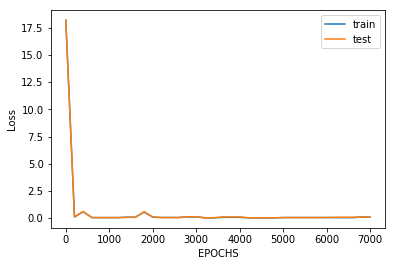

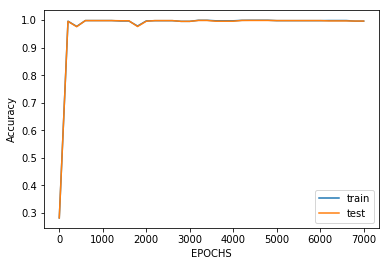

In [32]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)